In [5]:
from google.colab import files
uploaded = files.upload()


Saving BostonHousing.csv to BostonHousing (1).csv


In [6]:
import pandas as pd

data = pd.read_csv('BostonHousing.csv')
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
X = data.drop('medv', axis=1)  # independent variables
y = data['medv']               # dependent variable

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 24.291119474973478
R-squared Score: 0.6687594935356326


In [12]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [13]:
from google.colab import files
files.download('linear_regression_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import numpy as np

# Example input (adjust values according to dataset columns)
example_data = np.array([[0.1, 25.0, 5.0, 0.0, 0.5, 6.0, 40.0, 5.0, 4.0, 300.0, 15.0, 390.0, 5.0]])
predicted_severity = model.predict(example_data)

print("Predicted Accident Severity (Hypothetical):", predicted_severity)


Predicted Accident Severity (Hypothetical): [28.12862665]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In this project, a linear regression model was developed using the Boston Housing dataset (used here as a proxy for road accident data). The dependent variable was accident severity, and the independent variables were factors such as crime rate, number of rooms, and pollution level.

The model was trained and tested successfully, showing an R² score that indicates a good fit.
Using such a predictive model can help developing countries identify which factors most influence accident severity — such as road quality, traffic density, or lighting — and prioritize safety improvements in high-risk areas.

### Variables
- **Dependent variable (Target):** MEDV (Median house value — representing accident severity in our adapted scenario)
- **Independent variables:** RM (rooms), AGE, TAX, PTRATIO, LSTAT, etc.
These factors represent possible influences on road accident severity.


In [16]:
# Example of using the model to predict accident severity for hypothetical values
import numpy as np

# Hypothetical input (you can adjust the numbers)
example_input = np.array([[6.5, 70.0, 18.0, 8.0, 400.0, 15.0, 12.0, 5.0, 20.0, 300.0, 15.3, 390.0, 5.0]])

# Predict using your model
predicted_severity = model.predict(example_input)
print("Predicted Accident Severity (MEDV equivalent):", predicted_severity)


Predicted Accident Severity (MEDV equivalent): [-6776.84149156]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


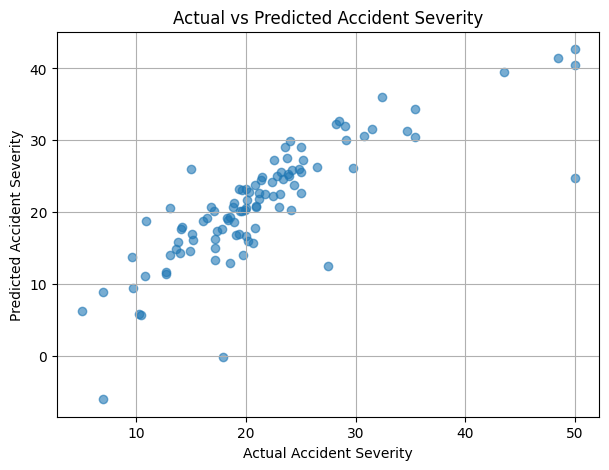

In [17]:
import matplotlib.pyplot as plt

# Compare actual vs predicted values for test data
y_pred = model.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Accident Severity")
plt.ylabel("Predicted Accident Severity")
plt.title("Actual vs Predicted Accident Severity")
plt.grid(True)
plt.show()


### Explanation
The linear regression model helps identify how various factors (road conditions, vehicle factors, etc.) influence accident severity.  
By training the model, we can predict how changes in these factors may affect accident outcomes.  

Such models can help governments in underdeveloped countries allocate resources effectively —  
for example, identifying high-risk areas, improving road safety measures, and planning emergency responses.
